In [1]:
# Cell 0: 모듈 import를 위한 경로 설정
import os, sys
sys.path.append(os.path.abspath(".."))  # shared, models 디렉토리 접근 가능하도록 경로 추가


In [2]:
import os
print(os.getcwd())  # 현재 작업 디렉토리 출력
log_path = "../results/fno/fno_sample100_epoch100_log_train.csv"

/caefs/user/mmingyeong/_dm2ics_model_benchmark/dm2ics_model_benchmark/evaluation


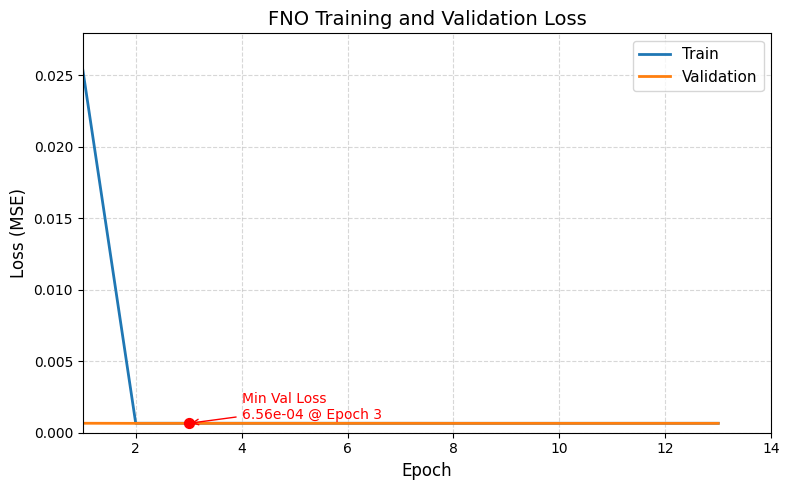

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

log = pd.read_csv(log_path)

# 최소 validation loss
min_idx = log["val_loss"].idxmin()
best_epoch = log["epoch"][min_idx]
best_loss = log["val_loss"][min_idx]

plt.figure(figsize=(8, 5))
plt.plot(log["epoch"], log["train_loss"], label="Train", color="C0", linewidth=2)
plt.plot(log["epoch"], log["val_loss"], label="Validation", color="C1", linewidth=2)

# 강조: 최소 validation loss 지점
plt.scatter(best_epoch, best_loss, color="red", s=50, zorder=5)
plt.annotate(
    f"Min Val Loss\n{best_loss:.2e} @ Epoch {best_epoch}",
    xy=(best_epoch, best_loss),
    xytext=(best_epoch + 1, best_loss + 0.0003),
    arrowprops=dict(arrowstyle="->", color="red"),
    fontsize=10,
    color="red"
)

# 축 범위 조정
plt.xlim(1, log["epoch"].max() + 1)
plt.ylim(0, max(log["train_loss"].max(), log["val_loss"].max()) * 1.1)

# 라벨 및 제목
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss (MSE)", fontsize=12)
plt.title("FNO Training and Validation Loss", fontsize=14)

# 기타 시각화 요소
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_projection_comparison(input_cube, gt_cube, pred_cube, axis=0, index=None, model_name="U-Net"):
    """
    하나의 subcube (3D 배열)을 받아, projection을 통해 2D로 시각화합니다.
    - axis: 투영 축
    - index: 시각화 대상 subcube 번호 (제목용)
    """

    # ✅ 더 이상 인덱싱하지 말고 바로 사용
    assert input_cube.ndim == 3, f"Expected 3D input, got {input_cube.shape}"
    assert 0 <= axis < 3, f"Invalid axis {axis} for shape {input_cube.shape}"

    input_proj = np.sum(input_cube, axis=axis)
    gt_proj = np.sum(gt_cube, axis=axis)
    pred_proj = np.sum(pred_cube, axis=axis)

    projections = [input_proj, gt_proj, pred_proj]
    titles = ["Input (Evolved Density)", "Ground Truth Initial Density", f"{model_name} Prediction"]

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for i, (proj, title) in enumerate(zip(projections, titles)):
        im = axs[i].imshow(proj, origin="lower", cmap="viridis")
        axs[i].set_title(title, fontsize=13)
        axs[i].axis("off")
        cbar = fig.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)
        cbar.set_label("Projected Density", fontsize=10)

    info_str = f"Projection axis = {axis} | Subcube index = {index} | Model = {model_name}"
    plt.suptitle(info_str, fontsize=15, y=1.05)

    plt.tight_layout()
    plt.show()


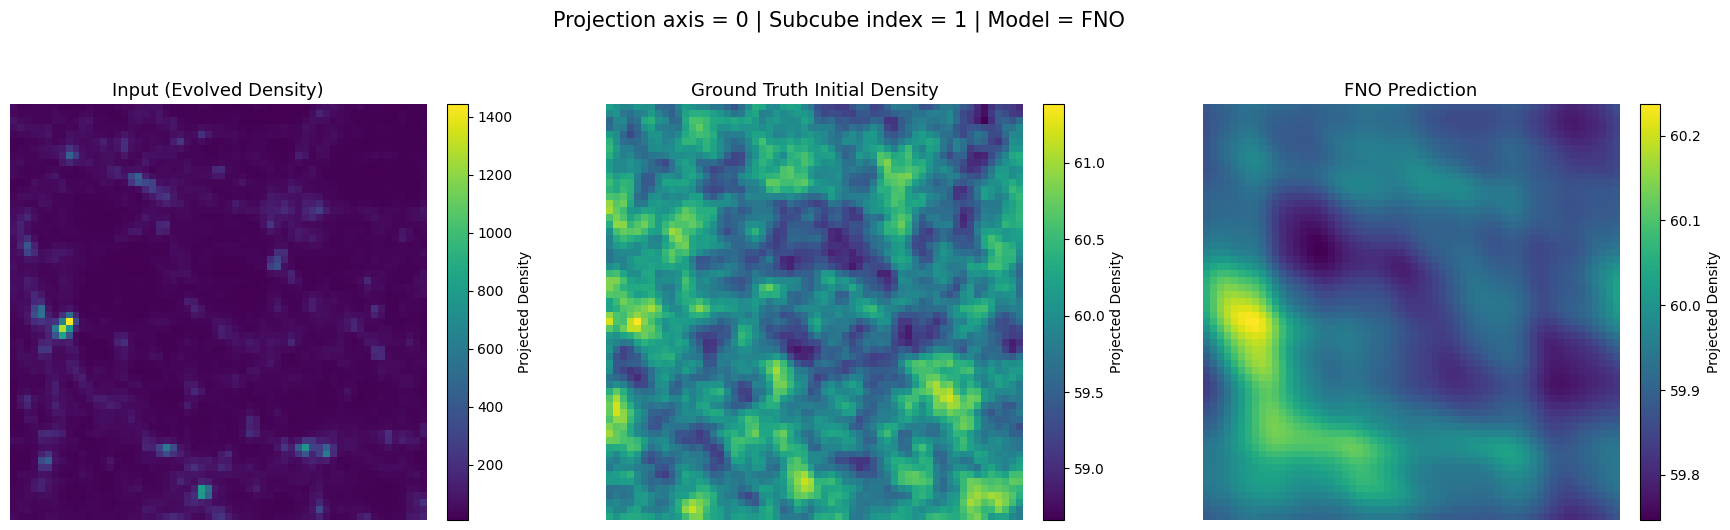

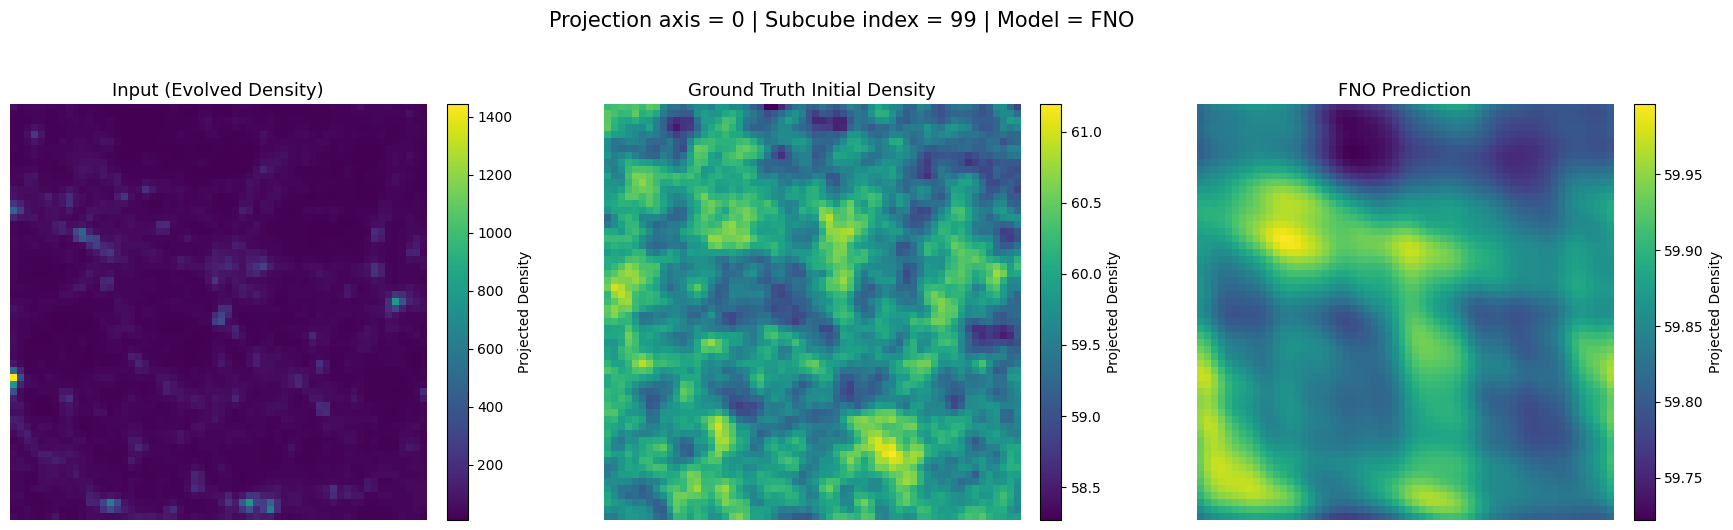

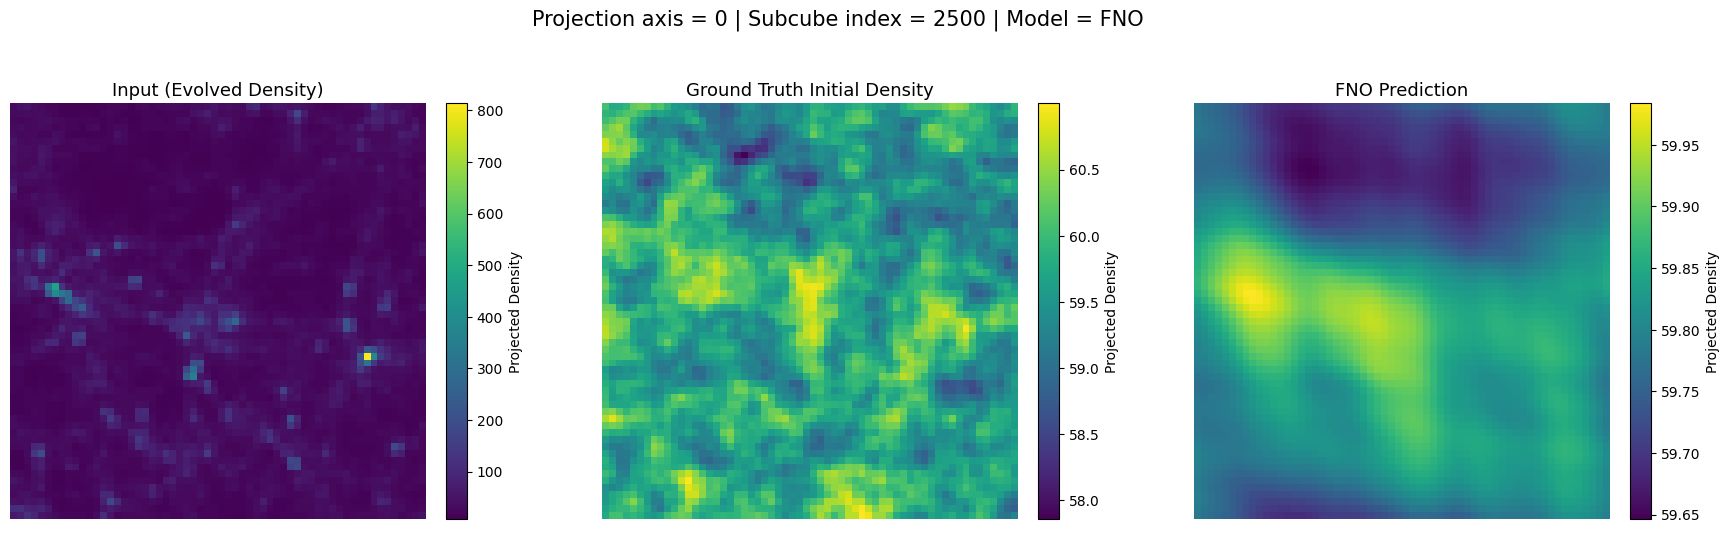

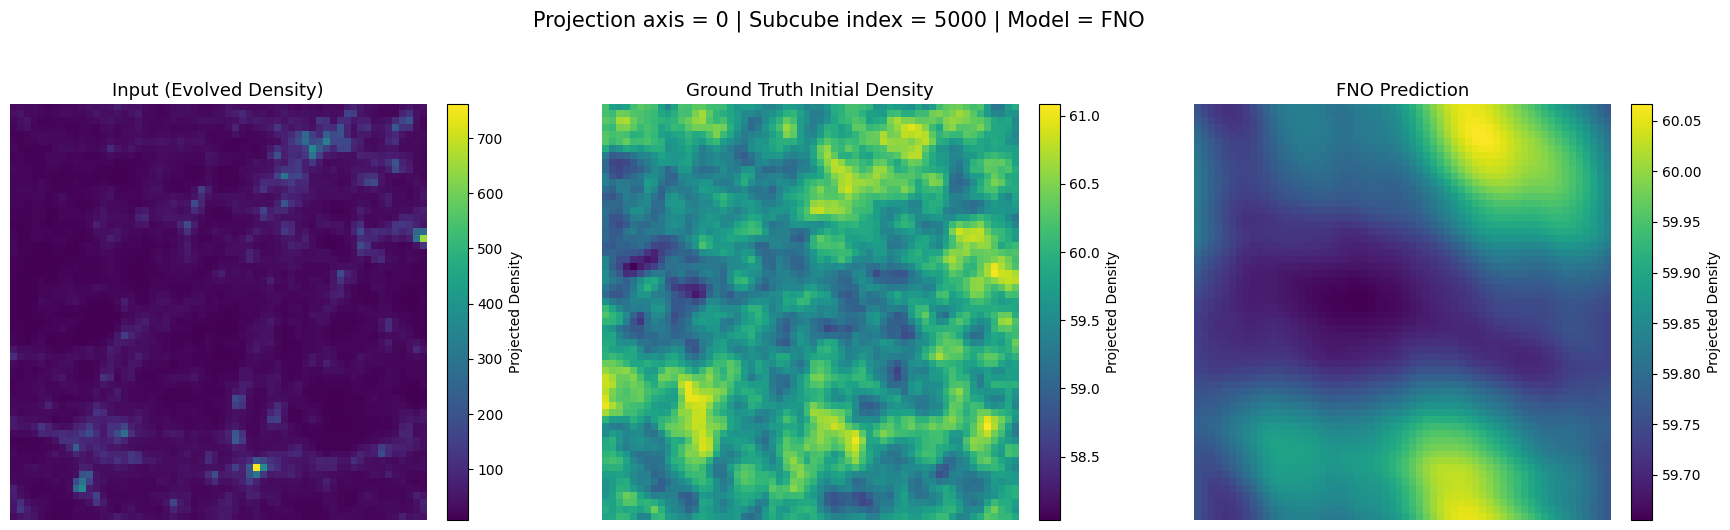

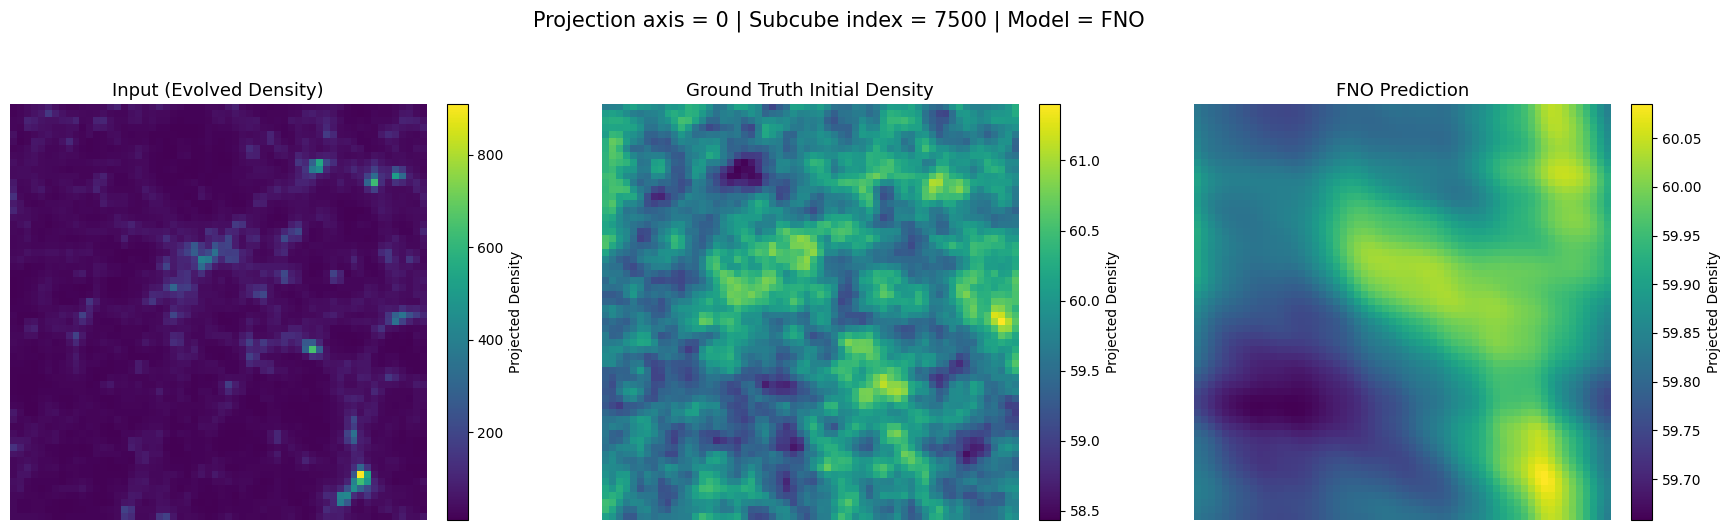

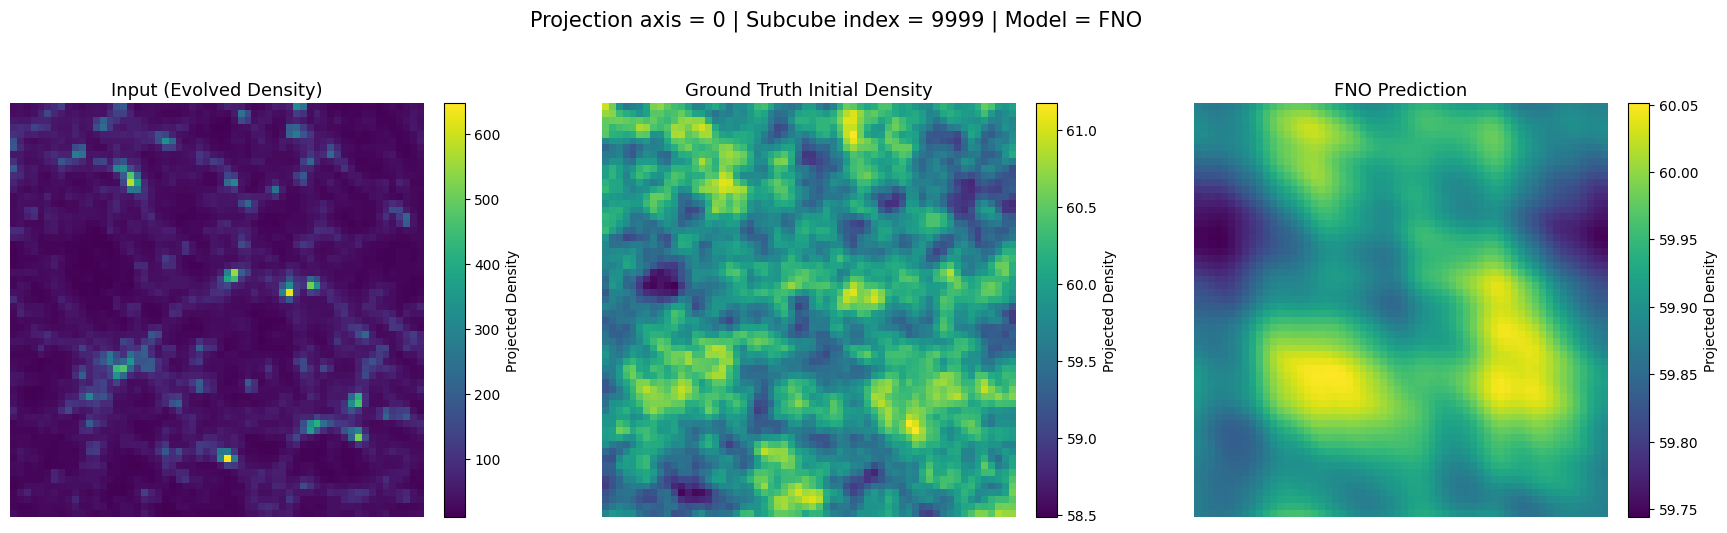

In [5]:
import h5py
import numpy as np
import random

input_file = "/caefs/data/IllustrisTNG/subcube/input/subcubes_stride4_50mpc_010.h5"
target_file = "/caefs/data/IllustrisTNG/subcube/output/subcubes_stride4_50mpc_010.h5"
prediction_file = "/caefs/data/IllustrisTNG/predictions/fno/Sample100_epoch100/subcubes_stride4_50mpc_010.h5"

index_list = [1, 99, 2500, 5000, 7500, 9999]

with h5py.File(input_file, "r") as f_in, \
     h5py.File(target_file, "r") as f_gt, \
     h5py.File(prediction_file, "r") as f_pred:

    for index in index_list:
        x = np.array(f_in["subcubes"][index])         # (60, 60, 60)
        y = np.array(f_gt["subcubes"][index])         # (60, 60, 60)
        pred = np.array(f_pred["subcubes"][index, 0]) # (60, 60, 60)

        plot_projection_comparison(x, y, pred, axis=0, index=index, model_name="FNO")


In [6]:
# 📁 Cell 0: 모듈 임포트 및 경로 설정
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 경로 설정
log_path = "../results/fno/fno_sample100_epoch100_log_train.csv"
index = 0  # 비교할 서브큐브 인덱스


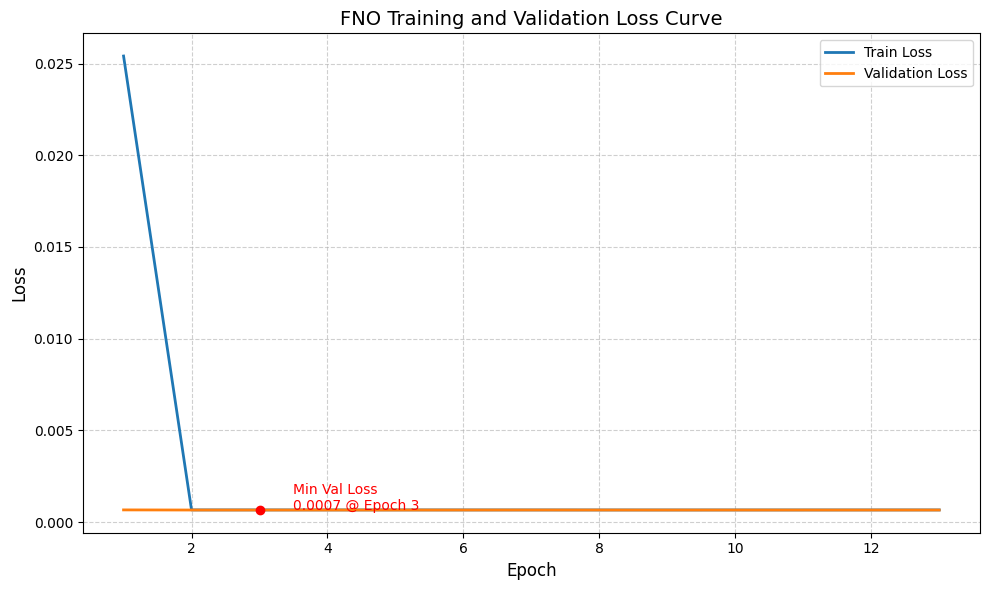

In [7]:
# 📁 Cell 0: 모듈 임포트 및 경로 설정
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 경로 설정
log_path = "../results/fno/fno_sample100_epoch100_log_train.csv"
index = 0  # 비교할 서브큐브 인덱스


import pandas as pd
import matplotlib.pyplot as plt

log = pd.read_csv(log_path)

plt.figure(figsize=(10, 6))
plt.plot(log["epoch"], log["train_loss"], label="Train Loss", linewidth=2)
plt.plot(log["epoch"], log["val_loss"], label="Validation Loss", linewidth=2)

# 최소 validation loss 지점 강조
min_idx = log["val_loss"].idxmin()
best_epoch = log["epoch"][min_idx]
best_loss = log["val_loss"][min_idx]
plt.scatter(best_epoch, best_loss, color="red", zorder=5)
plt.text(best_epoch + 0.5, best_loss, f"Min Val Loss\n{best_loss:.4f} @ Epoch {best_epoch}", color="red")

plt.title("FNO Training and Validation Loss Curve", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_projection_comparison(input_cube, gt_cube, pred_cube, axis=0, index=None, model_name="U-Net"):
    """
    하나의 subcube (3D 배열)을 받아, projection을 통해 2D로 시각화합니다.
    - axis: 투영 축
    - index: 시각화 대상 subcube 번호 (제목용)
    """

    # ✅ 더 이상 인덱싱하지 말고 바로 사용
    assert input_cube.ndim == 3, f"Expected 3D input, got {input_cube.shape}"
    assert 0 <= axis < 3, f"Invalid axis {axis} for shape {input_cube.shape}"

    input_proj = np.sum(input_cube, axis=axis)
    gt_proj = np.sum(gt_cube, axis=axis)
    pred_proj = np.sum(pred_cube, axis=axis)

    projections = [input_proj, gt_proj, pred_proj]
    titles = ["Input (Evolved Density)", "Ground Truth Initial Density", f"{model_name} Prediction"]

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for i, (proj, title) in enumerate(zip(projections, titles)):
        im = axs[i].imshow(proj, origin="lower", cmap="viridis")
        axs[i].set_title(title, fontsize=13)
        axs[i].axis("off")
        cbar = fig.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)
        cbar.set_label("Projected Density", fontsize=10)

    info_str = f"Projection axis = {axis} | Subcube index = {index} | Model = {model_name}"
    plt.suptitle(info_str, fontsize=15, y=1.05)

    plt.tight_layout()
    plt.show()


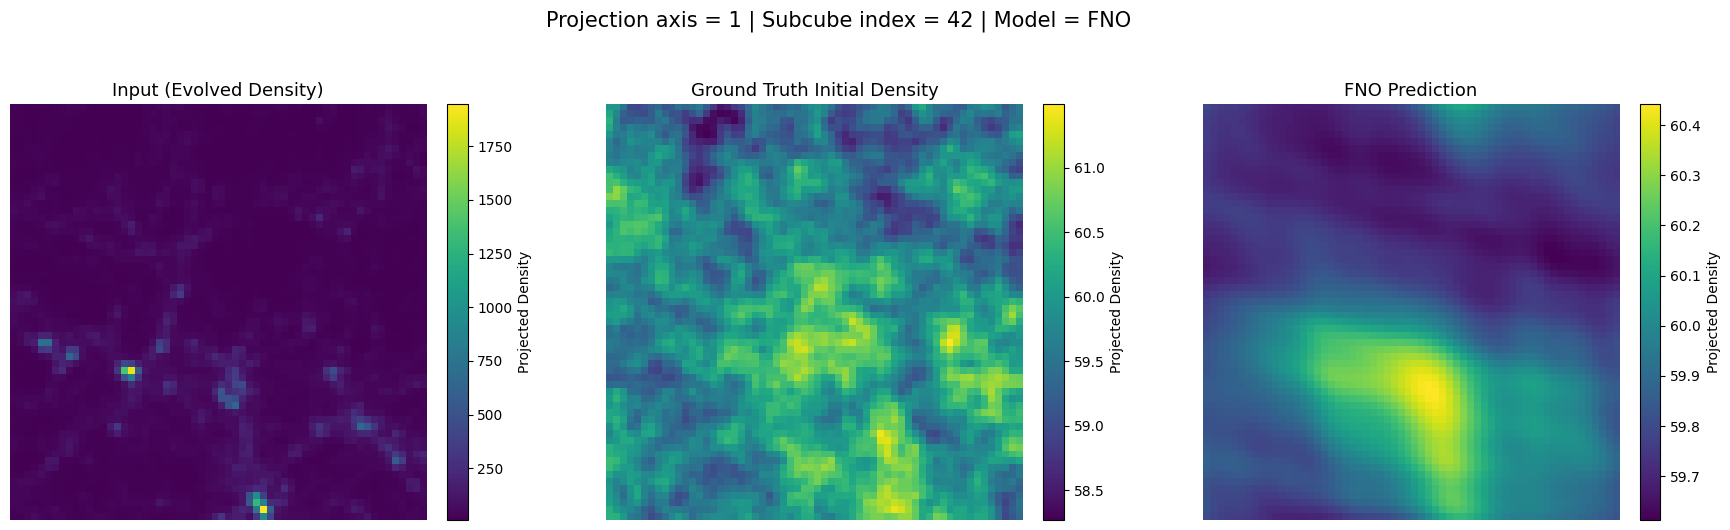

In [9]:
# 📁 경로 설정
input_file = "/caefs/data/IllustrisTNG/subcube/input/subcubes_stride4_50mpc_010.h5"
target_file = "/caefs/data/IllustrisTNG/subcube/output/subcubes_stride4_50mpc_010.h5"
prediction_file = "/caefs/data/IllustrisTNG/predictions/fno/Sample20_epoch50/subcubes_stride4_50mpc_010.h5"

index = 42  # 시각화할 subcube index

with h5py.File(input_file, "r") as f_in, \
     h5py.File(target_file, "r") as f_gt, \
     h5py.File(prediction_file, "r") as f_pred:

    x = np.array(f_in["subcubes"][index])             # (60, 60, 60)
    y = np.array(f_gt["subcubes"][index])             # (60, 60, 60)
    pred = np.array(f_pred["subcubes"][index, 0])     # (60, 60, 60)

plot_projection_comparison(x, y, pred, axis=1, index=index, model_name="FNO")


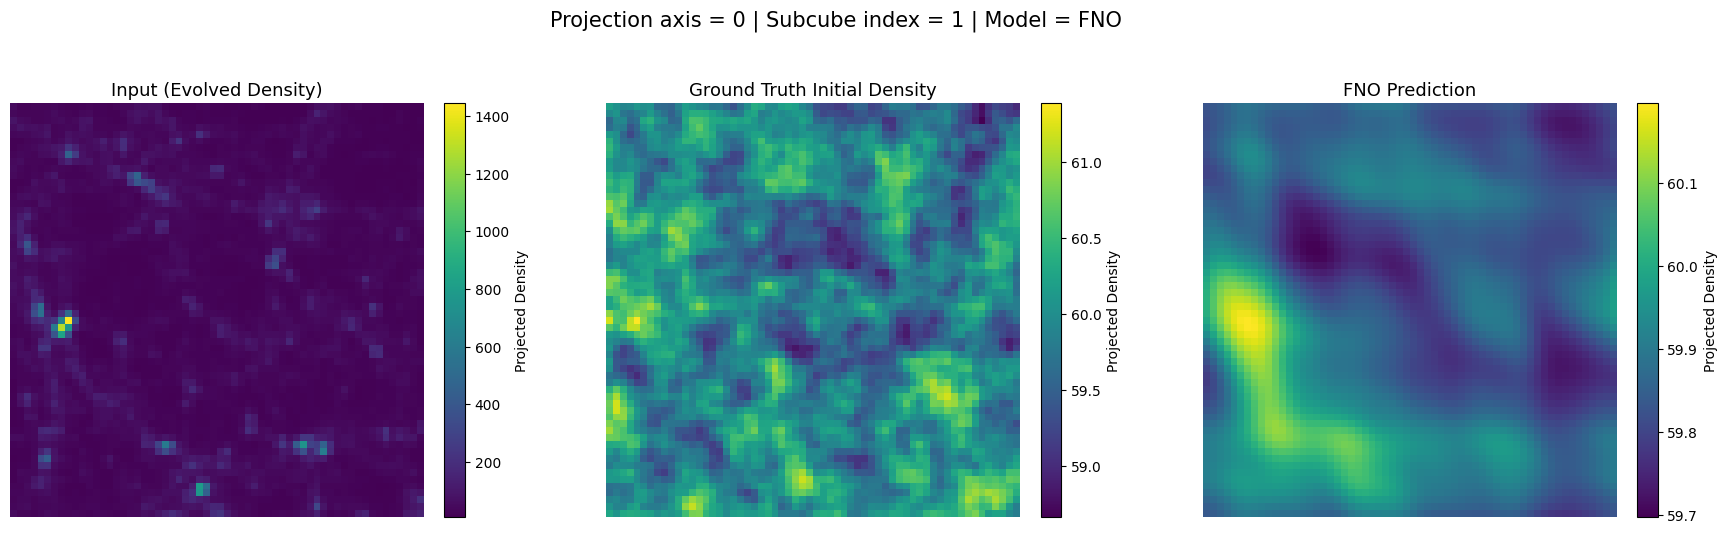

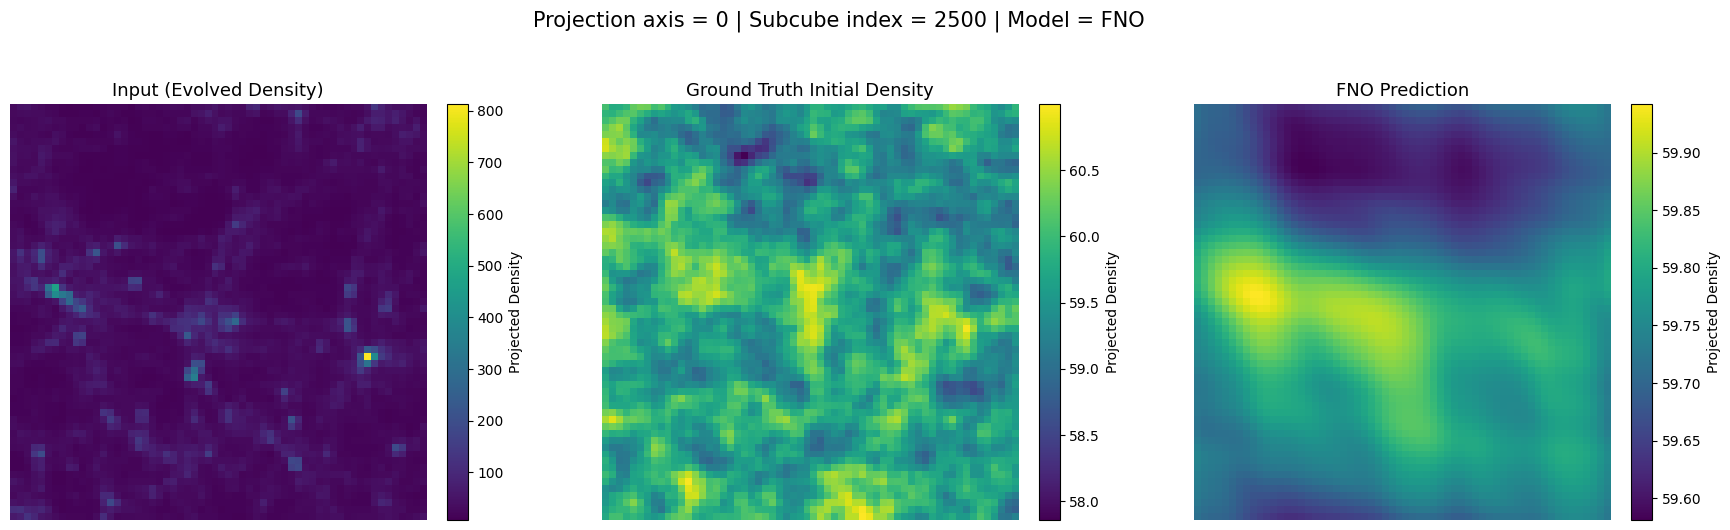

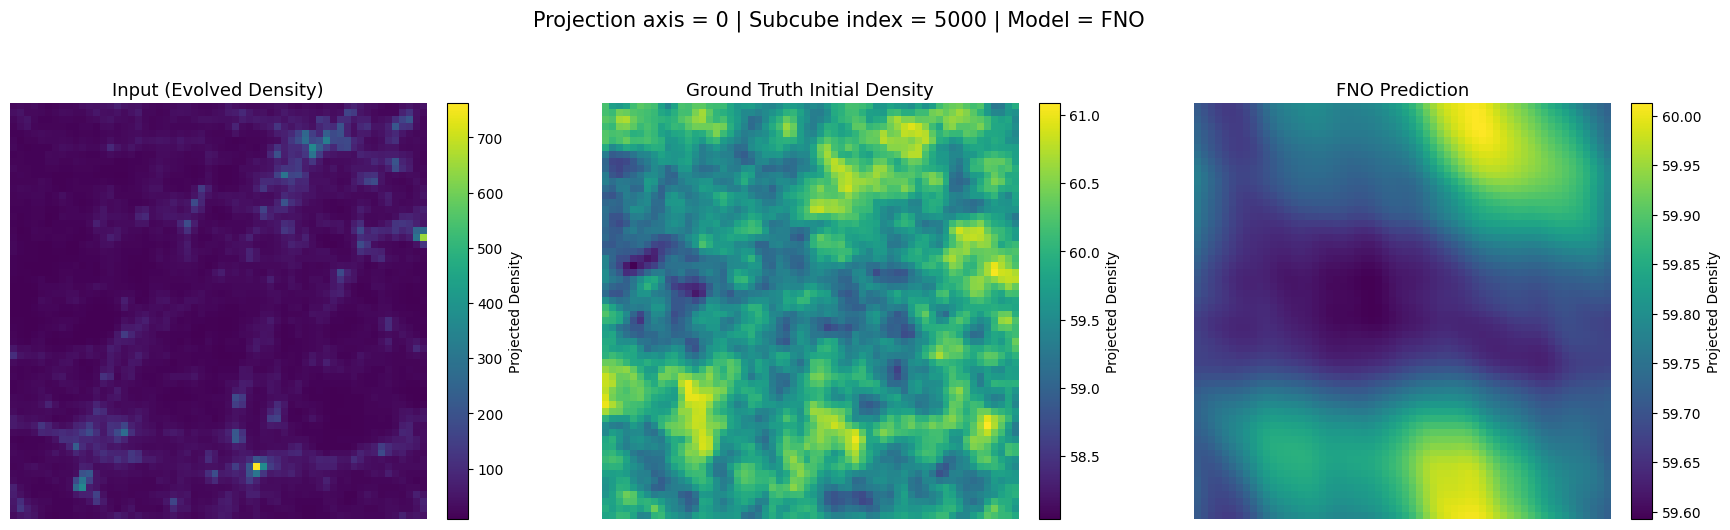

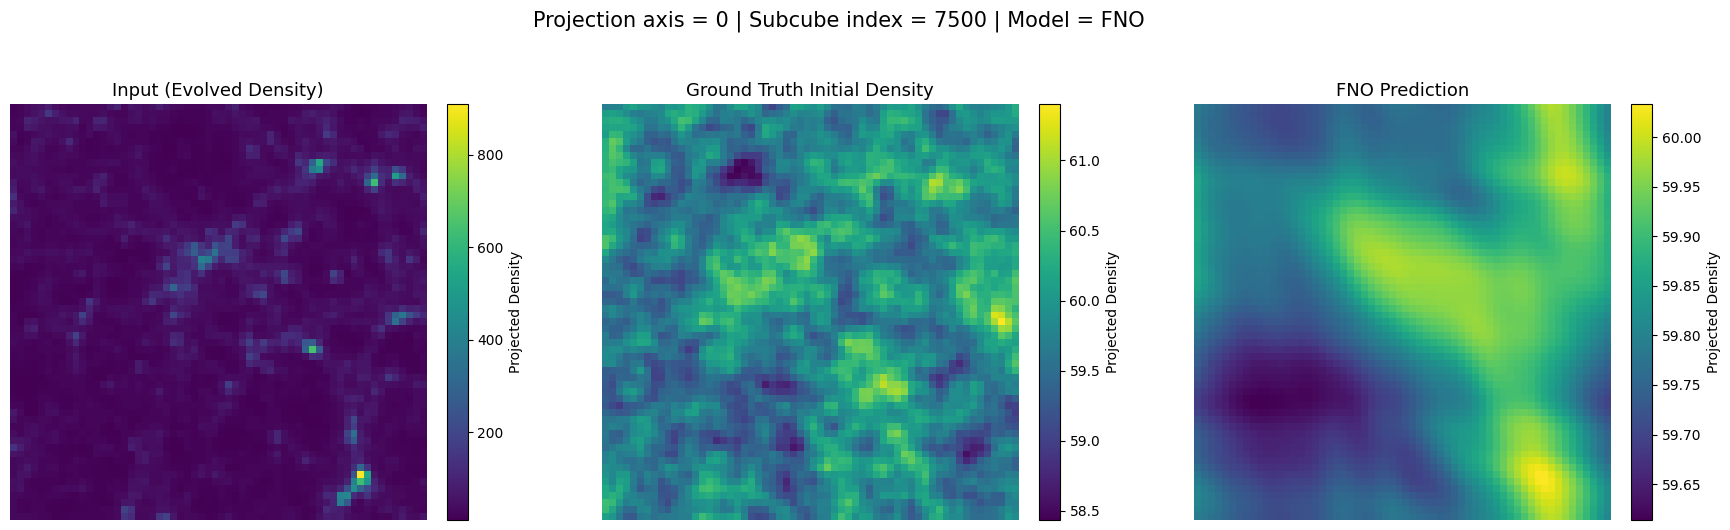

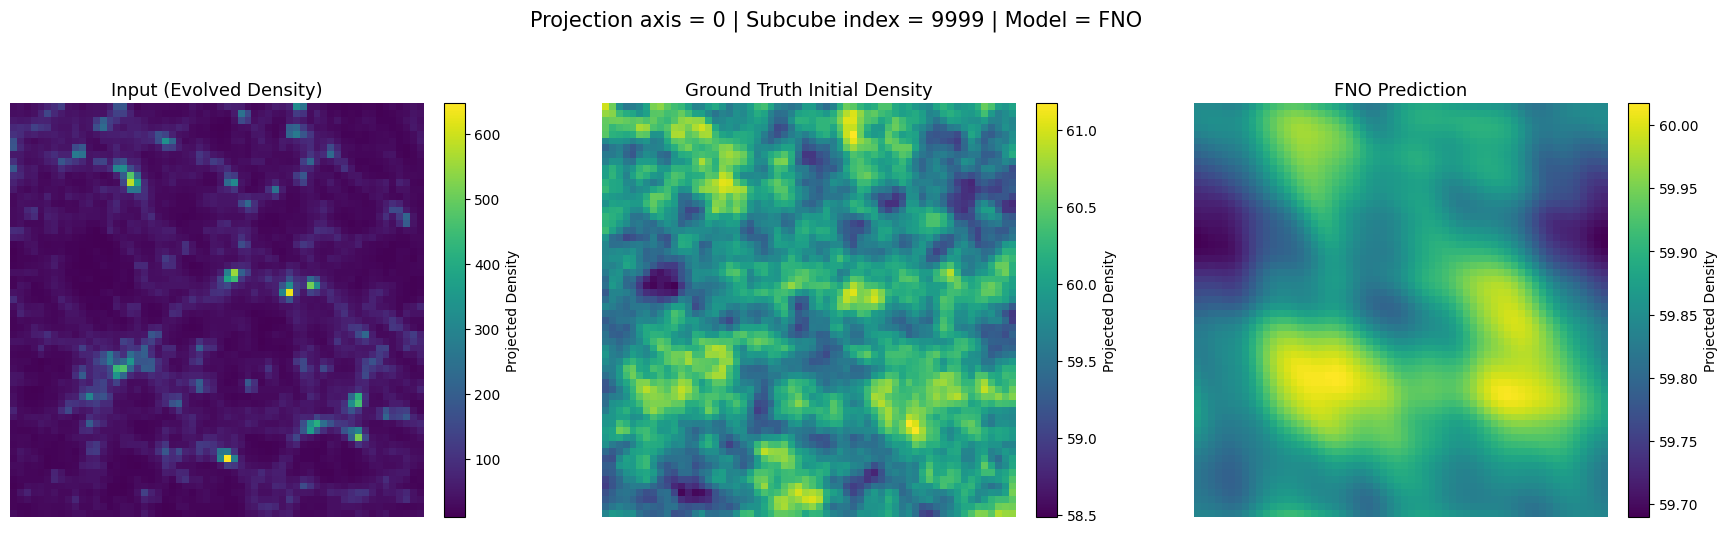

In [10]:
import h5py
import numpy as np
import random

input_file = "/caefs/data/IllustrisTNG/subcube/input/subcubes_stride4_50mpc_010.h5"
target_file = "/caefs/data/IllustrisTNG/subcube/output/subcubes_stride4_50mpc_010.h5"
prediction_file = "/caefs/data/IllustrisTNG/predictions/fno/Sample20_epoch50/subcubes_stride4_50mpc_010.h5"

index_list = [1, 2500, 5000, 7500, 9999]

with h5py.File(input_file, "r") as f_in, \
     h5py.File(target_file, "r") as f_gt, \
     h5py.File(prediction_file, "r") as f_pred:

    for index in index_list:
        x = np.array(f_in["subcubes"][index])         # (60, 60, 60)
        y = np.array(f_gt["subcubes"][index])         # (60, 60, 60)
        pred = np.array(f_pred["subcubes"][index, 0]) # (60, 60, 60)

        plot_projection_comparison(x, y, pred, axis=0, index=index, model_name="FNO")
